<a href="https://colab.research.google.com/github/MarioAuditore/AppliedLinearAlgebra/blob/main/SVD_Proncipal_angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачивание архива \
https://wiki.iphoster.net/wiki/Wget_-_как_выкачать_архив_c_Google_Drive_по_прямой_ссылке \
Датасет\
https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WDdtUYlZusuNq7hYOX8igN9JVCGitYjv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WDdtUYlZusuNq7hYOX8igN9JVCGitYjv" -O faces94.zip && rm -rf /tmp/cookies.txt

--2021-12-15 16:33:36--  https://docs.google.com/uc?export=download&confirm=&id=1WDdtUYlZusuNq7hYOX8igN9JVCGitYjv
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.102, 142.250.141.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-cc-docs.googleusercontent.com/docs/securesc/h2de0esui6670qtfs2mej6jl9kiu9gip/0ct7i3f6g9qoml3eh3b1pip0ucptb5rq/1639586025000/15165866794648613016/15788678805688232082Z/1WDdtUYlZusuNq7hYOX8igN9JVCGitYjv?e=download [following]
--2021-12-15 16:33:47--  https://doc-00-cc-docs.googleusercontent.com/docs/securesc/h2de0esui6670qtfs2mej6jl9kiu9gip/0ct7i3f6g9qoml3eh3b1pip0ucptb5rq/1639586025000/15165866794648613016/15788678805688232082Z/1WDdtUYlZusuNq7hYOX8igN9JVCGitYjv?e=download
Resolving doc-00-cc-docs.googleusercontent.com (doc-00-cc-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting

In [ ]:
!unzip faces94.zip

Archive:  faces94.zip
replace faces94/female/9336923/9336923.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: faces94/female/9336923/9336923.1.jpg  
  inflating: faces94/female/9336923/9336923.10.jpg  
  inflating: faces94/female/9336923/9336923.11.jpg  
  inflating: faces94/female/9336923/9336923.12.jpg  
  inflating: faces94/female/9336923/9336923.13.jpg  
  inflating: faces94/female/9336923/9336923.14.jpg  
  inflating: faces94/female/9336923/9336923.15.jpg  
  inflating: faces94/female/9336923/9336923.16.jpg  
  inflating: faces94/female/9336923/9336923.17.jpg  
  inflating: faces94/female/9336923/9336923.18.jpg  
  inflating: faces94/female/9336923/9336923.19.jpg  
  inflating: faces94/female/9336923/9336923.2.jpg  
  inflating: faces94/female/9336923/9336923.20.jpg  
  inflating: faces94/female/9336923/9336923.3.jpg  
  inflating: faces94/female/9336923/9336923.4.jpg  
  inflating: faces94/female/9336923/9336923.5.jpg  
  inflating: faces94/female/9336923/9336923.6.jpg

In [ ]:
import glob
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import svdvals
import os
%matplotlib inline

# Считаем изображения

In [ ]:
def create_image_set(dir):
  image_set =[]

  # for file in glob.glob(dir + "/*.jpg"):
  for file in glob.glob(dir +  "/*"):
    im = Image.open(file)
    im = im.resize((32, 32))
    image_set.append(im.convert('L'))
  plt.imshow(np.asarray(im.convert('L')), interpolation='nearest')
  plt.show()
  return image_set

In [ ]:
subfolders = [ f.path for f in os.scandir('/content/faces94/female') if f.is_dir() ]
subfolders

['/content/faces94/female/elduns',
 '/content/faces94/female/asewil',
 '/content/faces94/female/9338535',
 '/content/faces94/female/ekavaz',
 '/content/faces94/female/anpage',
 '/content/faces94/female/drbost',
 '/content/faces94/female/gotone',
 '/content/faces94/female/astefa',
 '/content/faces94/female/asamma',
 '/content/faces94/female/9336923']

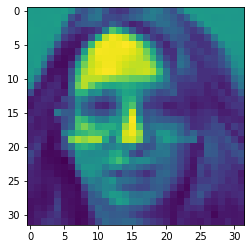

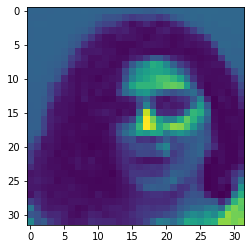

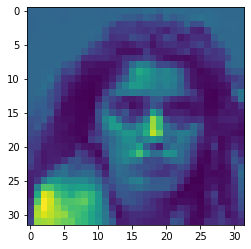

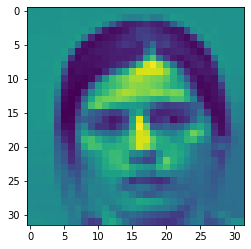

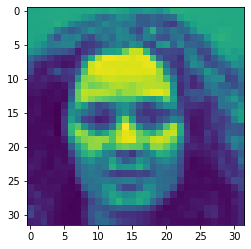

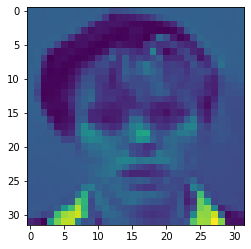

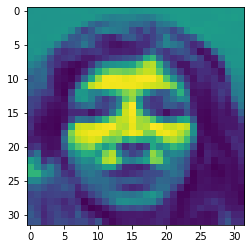

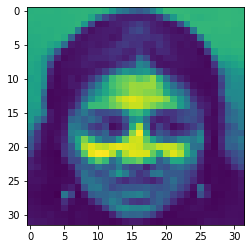

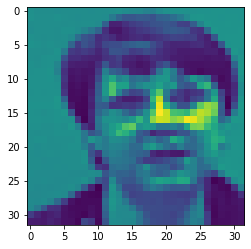

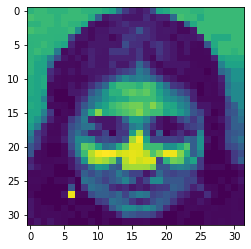

In [ ]:
all_images = []
for f in os.scandir('/content/faces94/female'):
  if (f.is_dir()) and (f.path != '/content/faces94/female/gotone'):
    all_images.append(create_image_set(f.path))

test_all_im_set = create_image_set('/content/faces94/female/gotone')

Размер картинок

In [ ]:
np.asarray(all_images[0][0]).shape

(32, 32)

# Теперь обработка

In [ ]:
from scipy.ndimage import gaussian_filter
from torchvision import transforms


def transformation(img_set, sigma = 1):
  im_mtx_1 = []
  im_mtx_1_torch = []
  im_mtx_2 = []
  im_mtx_2_torch = []

  for im in img_set:
    # Создаем оригинал
    matrix = np.asarray(im)
    im_mtx_1.append(matrix.flatten())

    # Преобразованный оригинал
    transform = transforms.Compose([transforms.RandomHorizontalFlip()])
    im_mtx_1_torch.append(np.asarray(transform(im)).flatten())

    # Обработанный Гауссом
    matrix_gauss = gaussian_filter(matrix, sigma=sigma)
    im_mtx_2.append(matrix_gauss.flatten())

    # Преобразованный обработанный Гауссом
    matrix_gauss_torch = gaussian_filter(np.asarray(transform(im)), sigma=sigma)
    im_mtx_2_torch.append(matrix_gauss_torch.flatten())

  return im_mtx_1, im_mtx_1_torch, im_mtx_2, im_mtx_2_torch


In [ ]:
originals = []
originals_torch = []

gaussian = []
gaussian_torch = []

for im_set in all_images:
   orig, orig_torch, gauss, gauss_torch = transformation(im_set)

   originals.append(np.transpose(orig))
   originals_torch.append(np.transpose(orig_torch))

   gaussian.append(np.transpose(gauss))
   gaussian_torch.append(np.transpose(gauss_torch))
  
print('Amount of sets ', len(originals))

Amount of sets  9


In [ ]:
np.array(originals[0]).shape

(1024, 20)

In [ ]:
from scipy.linalg import fractional_matrix_power
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

A = originals[0]
M =  rbf_kernel(np.transpose(originals[0]), np.transpose(originals[0]))
Delta, Q = np.linalg.eig(M)
Delta = np.diag(Delta)
U = A @ Q @ fractional_matrix_power(Delta, -0.5).real
print(U)

[[ 1.33000000e+02  1.86864218e+02 -1.23684901e+00 ... -1.99029752e+02
  -6.33003301e+01 -1.12100423e+02]
 [ 1.32000000e+02  1.84741545e+02 -5.31178213e-01 ... -1.97853752e+02
  -6.48517609e+01 -1.11107469e+02]
 [ 1.32000000e+02  1.86155756e+02  8.83032657e-01 ... -1.98118197e+02
  -6.66935396e+01 -1.11089190e+02]
 ...
 [ 2.50000000e+01  3.32670856e+01  7.38190058e-01 ... -4.26200539e+01
  -8.84098333e+00 -1.66056485e+01]
 [ 2.20000000e+01  3.39725900e+01  2.98939843e-02 ... -3.63162909e+01
  -1.17493972e+01 -1.42275215e+01]
 [ 1.90000000e+01  2.76044876e+01  7.32776584e-01 ... -3.14133391e+01
  -1.32610501e+01 -1.91479769e+01]]


# Создаем признаковое пространство и считаем углы

In [ ]:
originals[0].shape

(1024, 20)

In [ ]:
from scipy.linalg import fractional_matrix_power
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


M =  rbf_kernel(np.transpose(originals[1]), np.transpose(originals[1]))
is_pos_def(M)

True

In [ ]:
from scipy.linalg import fractional_matrix_power
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel



def principal_angle_rbf(set_1, set_2, sigma, r = 20):
  # Признаковые пространство 1
  M_1 = rbf_kernel(np.transpose(set_1), gamma = sigma**(-2))
  Delta_1, Q_1 = np.linalg.eig(M_1)
  Q_1 = Q_1[:, :r]
  Delta_1 = np.diag(Delta_1)[:r, :r]
  alpha_1 = Q_1 @ fractional_matrix_power(Delta_1, -0.5).real

  # Признаковые пространство 2
  M_2 = rbf_kernel(np.transpose(set_2), gamma = sigma**(-2))
  Delta_2, Q_2 = np.linalg.eig(M_2)
  Q_2 = Q_2[:, :r]
  Delta_2 = np.diag(Delta_2)[ :r, :r]
  alpha_2 = Q_2 @ fractional_matrix_power(Delta_2, -0.5).real

  # Нахождение расстояния
  D = np.transpose(alpha_1) @ rbf_kernel(np.transpose(set_1), np.transpose(set_2), gamma = sigma**(-2)) @ alpha_2
  return max(svdvals(D))


def principal_angle_polynomial(set_1, set_2, degree = 3, r = 20):
  # Признаковые пространство 1
  M_1 = polynomial_kernel(np.transpose(set_1), degree = degree)
  Delta_1, Q_1 = np.linalg.eig(M_1)
  Q_1 = Q_1[:, :r]
  Delta_1 = np.diag(Delta_1)[:r, :r]
  alpha_1 = Q_1 @ fractional_matrix_power(Delta_1, -0.5).real

  # Признаковые пространство 2
  M_2 = polynomial_kernel(np.transpose(set_2), degree = degree)
  Delta_2, Q_2 = np.linalg.eig(M_2)
  Q_2 = Q_2[:, :r]
  Delta_2 = np.diag(Delta_2)[ :r, :r]
  alpha_2 = Q_2 @ fractional_matrix_power(Delta_2, -0.5).real


  # Нахождение расстояния
  D = np.transpose(alpha_1) @ polynomial_kernel(np.transpose(set_1), np.transpose(set_2), degree = degree) @ alpha_2
  return max(svdvals(D))

Рассмотрим расстояния между первым и всеми остальными преобразованными

In [ ]:
originals_torch[8].shape

(1024, 20)

In [ ]:
originals[2].shape

(1024, 20)

In [ ]:
for sample in originals_torch:
  print('distance: ', principal_angle_rbf(originals[0], sample, sigma=170))

distance:  1.00000813630172
distance:  1.861206494840833e-66
distance:  1.2491170284593135e-63
distance:  4.430054578414911e-40
distance:  8.340127555939119e-22
distance:  7.2228803192398925e-68
distance:  2.882025103009801e-39
distance:  9.159870804710538e-39
distance:  4.1642761362911865e-68


In [ ]:
for i in range(len(originals)): 
  score = [principal_angle_polynomial(originals[i], another, degree=2) for another in originals]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.000000000002581
Closest to 1 is 1 with score: 1.0000000000055327
Closest to 2 is 2 with score: 1.0000000000030187
Closest to 3 is 3 with score: 1.00000000000206
Closest to 4 is 4 with score: 1.0000000000266789
Closest to 5 is 5 with score: 1.0000000000027158
Closest to 6 is 6 with score: 1.0000000000208984
Closest to 7 is 7 with score: 1.0000000000209686
Closest to 8 is 8 with score: 1.0000000000047504


In [ ]:
for i in range(len(originals)): 
  score = [principal_angle_rbf(originals[i], another, sigma=170, r = 20) for another in originals_torch]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.00000813630172
Closest to 1 is 1 with score: 1.000000000000002
Closest to 2 is 2 with score: 1.000000000000048
Closest to 3 is 3 with score: 1.024620972028003
Closest to 4 is 4 with score: 1.000000000000002
Closest to 5 is 5 with score: 1.0000000000000013
Closest to 6 is 6 with score: 1.0000000000003701
Closest to 7 is 7 with score: 1.0000000000000093
Closest to 8 is 8 with score: 1.0000000000000027


Теперь внутри одного множества

In [ ]:
for i in range(len(originals)):
  score = [principal_angle_rbf(originals[i], another, sigma=10, r = 20) for another in originals]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.0
Closest to 1 is 1 with score: 2.1598890792854384
Closest to 2 is 2 with score: 1.9166656719793778
Closest to 3 is 3 with score: 1.0000000000000002
Closest to 4 is 4 with score: 1.338971213608364
Closest to 5 is 5 with score: 1.4955389650514854
Closest to 6 is 6 with score: 1.6559578485096238
Closest to 7 is 7 with score: 1.0000000000000002
Closest to 8 is 8 with score: 1.4472135954999812


In [ ]:
# Можно брать сигма поменьше для Гауссовского размытия если сравнивать внутри того же набора
for i in range(len(gaussian)):
  score = [principal_angle_rbf(gaussian[i], another, sigma=10, r = 20) for another in gaussian]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.9774562069038781
Closest to 1 is 1 with score: 1.7072069985127043
Closest to 2 is 2 with score: 2.371604226301452
Closest to 3 is 3 with score: 2.2604199188850185
Closest to 4 is 4 with score: 2.087489514940124
Closest to 5 is 5 with score: 2.6540051951228585
Closest to 6 is 6 with score: 1.6958640218636756
Closest to 7 is 7 with score: 1.9581021268913852
Closest to 8 is 8 with score: 1.950561640393792


In [ ]:
# А вот с разными уже немного другой эффект, если брать минимальное сингулярное значение. При максимальном все гладко
for i in range(len(gaussian)):
  score = [principal_angle_rbf(gaussian[i], another, sigma=10, r = 20) for another in gaussian_torch]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.3634362652434575
Closest to 1 is 1 with score: 1.2099405086492456
Closest to 2 is 2 with score: 1.3774105644815213
Closest to 3 is 3 with score: 1.1148052631584133
Closest to 4 is 4 with score: 1.4516379321518205
Closest to 5 is 5 with score: 1.3196674158700274
Closest to 6 is 6 with score: 1.1961877309713258
Closest to 7 is 7 with score: 1.3763101558351298
Closest to 8 is 8 with score: 1.8524798935166955


In [ ]:
for i in range(len(gaussian)):
  score = [principal_angle_polynomial(gaussian[i], another, degree=2) for another in gaussian]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.0000000000059117
Closest to 1 is 1 with score: 1.0000000000072455
Closest to 2 is 2 with score: 1.0000000000117297
Closest to 3 is 3 with score: 1.0000000000102223
Closest to 4 is 4 with score: 1.0000000000465201
Closest to 5 is 5 with score: 1.0000000000162572
Closest to 6 is 6 with score: 1.0000000000478406
Closest to 7 is 7 with score: 1.00000000000858
Closest to 8 is 8 with score: 1.000000000046954


In [ ]:
for i in range(len(gaussian)):
  score = [principal_angle_polynomial(gaussian[i], another, degree=3) for another in gaussian_torch]
  closest = np.argmax(score)
  print(f'Closest to {i} is {closest} with score: {score[closest]}')

Closest to 0 is 0 with score: 1.0000000000005067
Closest to 1 is 1 with score: 1.0000000000013882
Closest to 2 is 2 with score: 1.000000000003028
Closest to 3 is 3 with score: 1.0000000000003189
Closest to 4 is 4 with score: 1.000000000002546
Closest to 5 is 5 with score: 1.0000000000019456
Closest to 6 is 6 with score: 1.0000000000061073
Closest to 7 is 7 with score: 1.000000000004249
Closest to 8 is 8 with score: 1.0000000000030238
